In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files_biometric = ["data/3api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv",
                   "data/3api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv",
                   "data/3api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv",
                   "data/3api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv"]

df3 = pd.concat([pd.read_csv(f) for f in files_biometric], ignore_index=True)

print("Total biometric records:", len(df3))

Total biometric records: 1861108


Clean Biometric Data

In [3]:
print("Unique raw states: ", df3['state'].nunique())
print(df3['state'].value_counts())


Unique raw states:  57
state
Tamil Nadu                                  184568
Andhra Pradesh                              172034
Uttar Pradesh                               155242
Maharashtra                                 151104
Karnataka                                   141227
West Bengal                                 130735
Kerala                                       98511
Gujarat                                      89531
Odisha                                       86476
Bihar                                        83398
Telangana                                    82579
Rajasthan                                    79724
Madhya Pradesh                               70080
Punjab                                       48108
Assam                                        47643
Jharkhand                                    36625
Chhattisgarh                                 31992
Himachal Pradesh                             30385
Haryana                                      26429
Ut

In [4]:
df3["state_clean"]=df3['state'].str.lower().str.strip()

print("Unique raw states: ", df3['state_clean'].nunique())
print(df3['state_clean'].value_counts())

Unique raw states:  50
state_clean
tamil nadu                                  184568
andhra pradesh                              172065
uttar pradesh                               155242
maharashtra                                 151104
karnataka                                   141227
west bengal                                 130788
kerala                                       98511
gujarat                                      89531
odisha                                       86521
bihar                                        83398
telangana                                    82579
rajasthan                                    79724
madhya pradesh                               70080
punjab                                       48108
assam                                        47643
jharkhand                                    36625
chhattisgarh                                 31992
himachal pradesh                             30385
haryana                                      26

In [5]:
fix_map = {
    "andaman & nicobar": "andaman and nicobar islands",
    "andaman and nicobar": "andaman and nicobar islands",
    "andaman & nicobar islands": "andaman and nicobar islands",
    
    "chhatisgarh": "chhattisgarh",
    
    "orissa": "odisha",
    
    "pondicherry": "puducherry",
    
    "tamilnadu": "tamil nadu",
    
    "west bangal": "west bengal",
    "westbengal": "west bengal",
    "west  bengal": "west bengal",
    "west bengli": "west bengal",
    
    "jammu & kashmir": "jammu and kashmir",
    
    "dadra & nagar haveli": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli": "dadra and nagar haveli and  daman and diu",
    "daman and diu": "dadra and nagar haveli and  daman and diu",
    "daman & diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and  daman and diu": "dadra and nagar haveli and  daman and diu",
    "dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    "the dadra and nagar haveli and daman and diu": "dadra and nagar haveli and  daman and diu",
    
    "uttaranchal": "uttarakhand",
    "darbhanga": "bihar",
    "balanagar": "telangana",
    "jaipur": "rajasthan",
    "madanapalle": "andhra pradesh",
    "puttenahalli": "karnataka",
    "nagpur": "maharashtra",
    "raja annamalai puram": "tamil nadu",
    
    "100000" : None
    }


In [6]:
df3["state_clean"] = df3["state_clean"].replace(fix_map)
df3 = df3[df3["state_clean"].notna()]
print(sorted(df3["state_clean"].unique()))
print("Unique raw states: ", df3["state_clean"].nunique())
print(df3["state_clean"].value_counts())

['andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli and  daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
Unique raw states:  36
state_clean
tamil nadu                                   184569
andhra pradesh                               172065
uttar pradesh                                155242
maharashtra                                  151104
karnataka                                    141227
west bengal                                  130895
odisha                                        99674
kerala                                        98511
gujarat                

Clean distric in biometric data

In [7]:
print("Unique raw district: ", df3["district"].nunique())
print(df3["district"].value_counts())


Unique raw district:  974
district
Pune                 11586
Thrissur             11165
East Godavari        10647
North 24 Parganas    10595
Barddhaman           10545
                     ...  
udhampur                 1
Mahoba *                 1
Chandauli *              1
Poonch                   1
Salumbar                 1
Name: count, Length: 974, dtype: int64


In [8]:
df3["district_clean"]=df3['district'].str.lower().str.strip()

print("Unique raw district: ", df3['district_clean'].nunique())
print(df3['district_clean'].value_counts())

Unique raw district:  949
district_clean
pune                 11586
thrissur             11165
east godavari        10647
north 24 parganas    10595
barddhaman           10545
                     ...  
khordha  *               1
mahoba *                 1
chandauli *              1
poonch                   1
salumbar                 1
Name: count, Length: 949, dtype: int64


In [9]:
fix_map = {
    "allahabad": "prayagraj",
    "faizabad": "ayodhya",
    "hoshangabad": "narmadapuram",
    "ahmednagar": "ahilyanagar",
    "ahmadnagar": "ahilyanagar",
    "ahmed nagar": "ahilyanagar",
    "osmanabad": "dharashiv",

    "bangalore": "bengaluru",
    "bangalore urban": "bengaluru urban",
    "bangalore rural": "bengaluru rural",
    "calcutta": "kolkata",
    "madras": "chennai",
    "trivandrum": "thiruvananthapuram",
    "mysore": "mysuru",

    "bellary": "ballari",
    "bijapur": "vijayapura",
    "chickmagalur": "chikkamagaluru",
    "chikmagalur": "chikkamagaluru",
    "chickballapur": "chikkaballapura",
    "chikballapur": "chikkaballapura",
    "gulbarga": "kalaburagi",

    "greater mumbai": "mumbai",
    "mumbai suburban": "mumbai",
    "mumbai city": "mumbai",
    "mumbai( sub urban )": "mumbai",
    "bombay": "mumbai",
    "poona": "pune",

    "rangareddy": "ranga reddy",
    "rangareddi": "ranga reddy",
    "k.v. rangareddy": "ranga reddy",
    "k.v.rangareddy": "ranga reddy",
    "cuddapah": "ysr kadapa",
    "kadapa": "ysr kadapa",
    "ysr": "ysr kadapa",
    "y s r": "ysr kadapa",
    "y. s. r": "ysr kadapa",
    "vizag": "visakhapatnam",
    "visakhapatanam": "visakhapatnam",
    "ananthapur": "ananthapuramu",
    "anantapur": "ananthapuramu",

    "tuticorin": "thoothukudi",
    "tiruvallur": "thiruvallur",
    "kancheepuram": "kanchipuram",
    "vellore rural": "vellore",
    "tirupathur": "tirupattur",
    "villupuram": "viluppuram",

    "palghat": "palakkad",
    "cannanore": "kannur",
    "alleppey": "alappuzha",
    "cochin": "ernakulam",
    "quilion": "kollam",
    "quilon": "kollam",
    "trichur": "thrissur",

    "balasore": "baleshwar",
    "cuttack sadar": "cuttack",

    "sibsagar": "sivasagar",
    "darrang": "darang",
    "gauhati": "kamrup metro",
    "north cachar hills": "dima hasao",

    "purnea": "purnia",
    "samstipur": "samastipur",

    "durg bhilai": "durg",

    "leh ladakh": "leh",
    "kargil ladakh": "kargil",

    "ahmadabad": "ahmedabad",
    "ahmedabad city": "ahmedabad",
    "ahmedabad rural": "ahmedabad",
    "baroda": "vadodara",

    "24 paraganas north": "north 24 parganas",
    "north twenty four parganas": "north 24 parganas",
    "24 paraganas south": "south 24 parganas",
    "south twenty four parganas": "south 24 parganas",
    "medinipur": "paschim medinipur",
    "west midnapore": "paschim medinipur",
    "east midnapore": "purba medinipur",
    "bardhaman east": "purba bardhaman",
    "barddhaman": "purba bardhaman",
    "bardhaman": "purba bardhaman",
    "burdwan": "purba bardhaman",
    "bardhaman west": "paschim bardhaman",
    "hooghiy": "hooghly",
    "hugli": "hooghly",
    "hawrah": "howrah",
    "haora": "howrah",

    "banaras": "varanasi",

    "gurgaon": "gurugram",
    "yamuna nagar": "yamunanagar",

    "pondicherry": "puducherry",

    "aurangabad(bh)": "aurangabad",
    "ashoknagar": "ashok nagar",
    "east nimar": "khandwa",
    "west nimar": "khargone",

    "bagpat": "baghpat",
    "belgaum": "belagavi",
    "bid": "beed",
    "bijapur(kar)": "vijayapura",
    "sheikpura": "sheikhpura",
    "shrawasti": "shravasti",
    "siddharthnagar": "siddharth nagar",
    "surendra nagar": "surendranagar",
    "warangal (urban)": "warangal",
    "warangal urban": "warangal",
    "warangal rural": "warangal",

    "bokaro *": "bokaro",
    "bagalkot *": "bagalkot",
    "gadag *": "gadag",
    "harda *": "harda",
    "haveri *": "haveri",
    "hingoli *": "hingoli",
    "namakkal   *": "namakkal",
    "kendrapara *": "kendrapara",
    "udupi *": "udupi",
    "washim *": "washim",

    "the nilgiris": "nilgiris",
    "the dangs": "dang",
    "nicobars": "nicobar",

    "na": None,
    "n a": None,
    "null": None,
    "unknown": None,
    "0": None,
    "100000": None,
    "northeast   *": None,
    "north and middle andaman": None,
    "andamans": None,
    "east": None,
    "west": None,
    "north": None,
    "south": None,
    "new delhi": None,
    "najafgarh": None,

    "baleswar": "baleshwar",
    "banas kantha": "banaskantha",
    "bara banki": "barabanki",
    "cooch behar": "koch bihar",
    "khorda": "khordha",
    "puruliya": "purulia",
    "kasargod": "kasaragod",
    "karim nagar": "karimnagar",
    "hasan": "hassan",
    "hardwar": "haridwar",

    "chamrajanagar": "chamarajanagar",
    "chamrajnagar": "chamarajanagar",
    "chamarajanagar *": "chamarajanagar",

    "dadra & nagar haveli": "dadra and nagar haveli",

    "dhalai  *": "dhalai",
    "garhwa *": "garhwa",
    "gondiya *": "gondia",
    "nandurbar *": "nandurbar",
    "kushinagar *": "kushinagar",

    "gondiya": "gondia",
    "monghyr": "munger",
    "mammit": "mamit",
    "lahul & spiti": "lahaul and spiti",

    "medchal?malkajgiri": "medchal-malkajgiri",
    "medchal−malkajgiri": "medchal-malkajgiri",

    "sas nagar (mohali)": "s.a.s nagar(mohali)",

    "south 24 pargana": "south 24 parganas",

    "n. t. r": "ntr",

}


In [10]:
pd.set_option('display.max_rows', 1000)
df3["district_clean"] = df3["district_clean"].replace(fix_map)
df3 = df3[df3["district_clean"].map(df3["district_clean"].value_counts()) >= 10]
df3 = df3[df3["district_clean"].notna()]
print(sorted(df3["district_clean"].unique()))
print("Unique raw districts: ", df3["district_clean"].nunique())
print(df3["district_clean"].value_counts())


['adilabad', 'agar malwa', 'agra', 'ahilyanagar', 'ahmedabad', 'aizawl', 'ajmer', 'akola', 'alappuzha', 'aligarh', 'alipurduar', 'alirajpur', 'alluri sitharama raju', 'almora', 'alwar', 'ambala', 'ambedkar nagar', 'amethi', 'amravati', 'amreli', 'amritsar', 'amroha', 'anakapalli', 'anand', 'ananthapuramu', 'anantnag', 'angul', 'anjaw', 'annamayya', 'anugul', 'anuppur', 'araria', 'ariyalur', 'arvalli', 'arwal', 'ashok nagar', 'auraiya', 'aurangabad', 'ayodhya', 'azamgarh', 'badgam', 'bagalkot', 'bageshwar', 'baghpat', 'bahraich', 'bajali', 'baksa', 'balaghat', 'balangir', 'baleshwar', 'ballari', 'ballia', 'balod', 'baloda bazar', 'balrampur', 'banaskantha', 'banda', 'bandipore', 'banka', 'bankura', 'banswara', 'bapatla', 'barabanki', 'baramula', 'baran', 'bardez', 'bareilly', 'bargarh', 'barmer', 'barnala', 'barpeta', 'barwani', 'bastar', 'basti', 'bathinda', 'baudh', 'beed', 'begusarai', 'belagavi', 'bemetara', 'bengaluru', 'bengaluru rural', 'bengaluru south', 'betul', 'bhabua', 'bhad

Finding Insights


In [11]:
df3["total_biometric"] = (df3["bio_age_5_17"] + df3["bio_age_17_"])
state_summary = (df3.groupby("state_clean")["total_biometric"].sum().reset_index().sort_values(by="total_biometric", ascending=False))
print(state_summary)

                                  state_clean  total_biometric
33                              uttar pradesh          9577721
20                                maharashtra          9226139
19                             madhya pradesh          5923771
4                                       bihar          4897587
30                                 tamil nadu          4698109
28                                  rajasthan          3994923
1                              andhra pradesh          3714633
10                                    gujarat          3196514
6                                chhattisgarh          2648422
15                                  karnataka          2635954
35                                west bengal          2524588
25                                     odisha          2464954
14                                  jharkhand          2026297
27                                     punjab          1739671
31                                  telangana          

In [12]:
state_summary = state_summary.reset_index(drop=True)
state_summary["Overall_Rank"] = range(1, len(state_summary)+1)
top10 = state_summary.head(10).copy()
top10=top10.reset_index(drop=True)
top10["Top10 Rank"] = range(1, len(top10) + 1)
print("/n Top 10 states by biometric:")
print(top10[["Top10 Rank", "state_clean", "total_biometric"]].to_string(index=False))

/n Top 10 states by biometric:
 Top10 Rank    state_clean  total_biometric
          1  uttar pradesh          9577721
          2    maharashtra          9226139
          3 madhya pradesh          5923771
          4          bihar          4897587
          5     tamil nadu          4698109
          6      rajasthan          3994923
          7 andhra pradesh          3714633
          8        gujarat          3196514
          9   chhattisgarh          2648422
         10      karnataka          2635954


In [13]:
bottom10 = state_summary.tail(10).copy()
bottom10=bottom10.reset_index(drop=True)
bottom10["Bottom10 Rank"] = range(1, len(bottom10) + 1)
print("/n Bottom 10 states by biometric:")
print(bottom10[["Bottom10 Rank", "state_clean", "total_biometric"]].to_string(index=False))

/n Bottom 10 states by biometric:
 Bottom10 Rank                               state_clean  total_biometric
             1                                 meghalaya            87610
             2                                chandigarh            74476
             3                         arunachal pradesh            72394
             4                                puducherry            69908
             5                                       goa            68395
             6 dadra and nagar haveli and  daman and diu            39268
             7               andaman and nicobar islands            12300
             8                                    sikkim            10351
             9                                    ladakh             5763
            10                               lakshadweep             4820


Visualizing the demographic distribution across states

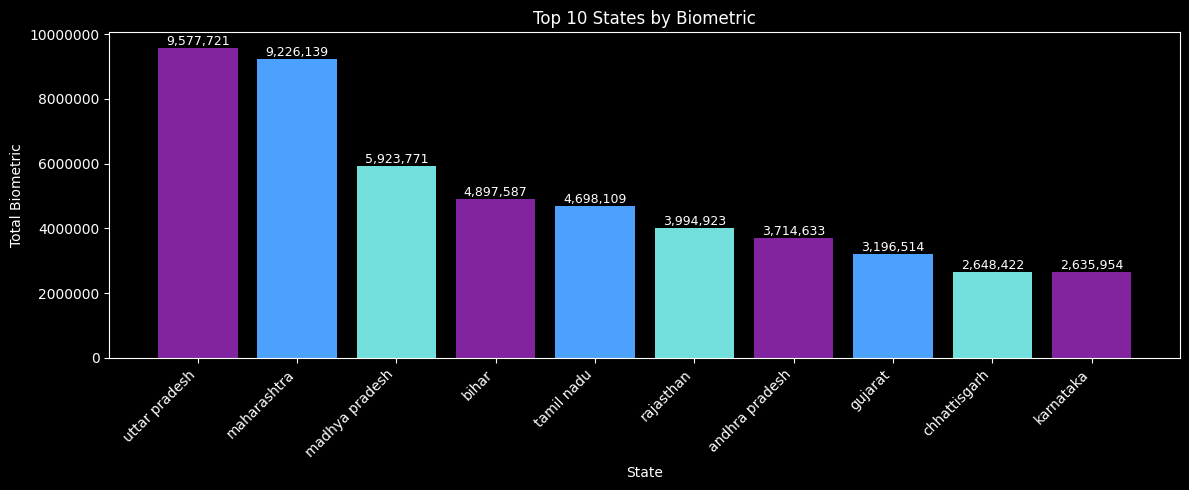

In [14]:
# for top 10 states, plot a bar chart
colors = ["#82249f", "#4CA1FC", "#72dfdd"]

plt.figure(figsize=(12,5))
bars = plt.bar(
    top10["state_clean"],
    top10["total_biometric"],
    color=colors * 4  
)


plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Biometric")
plt.xlabel("State")
plt.ylabel("Total Biometric")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()


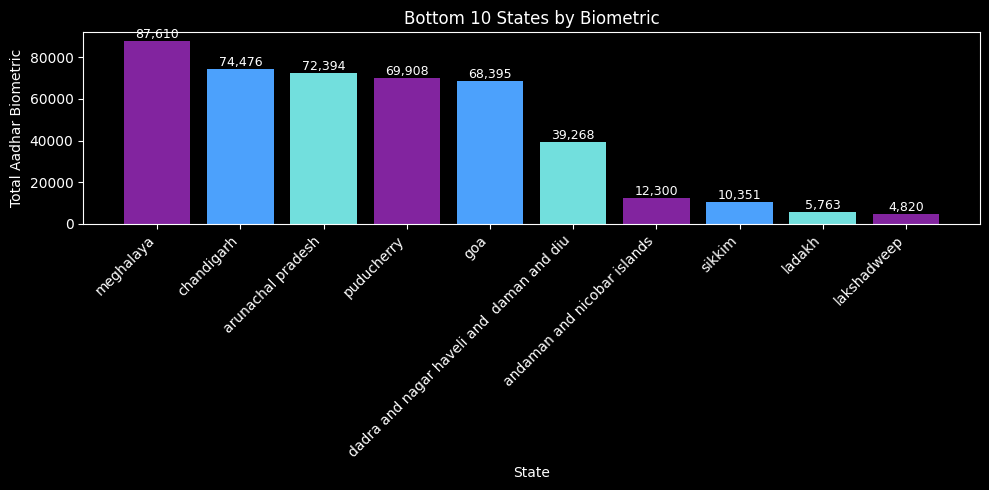

In [15]:
# for bottom 10 states, plot a bar chart
plt.figure(figsize=(10,5))
bars = plt.bar(
    bottom10["state_clean"],
    bottom10["total_biometric"],
    color=colors * 4
)

plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 States by Biometric")
plt.xlabel("State")
plt.ylabel("Total Aadhar Biometric")
plt.ticklabel_format(style="plain", axis="y")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{int(h):,}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

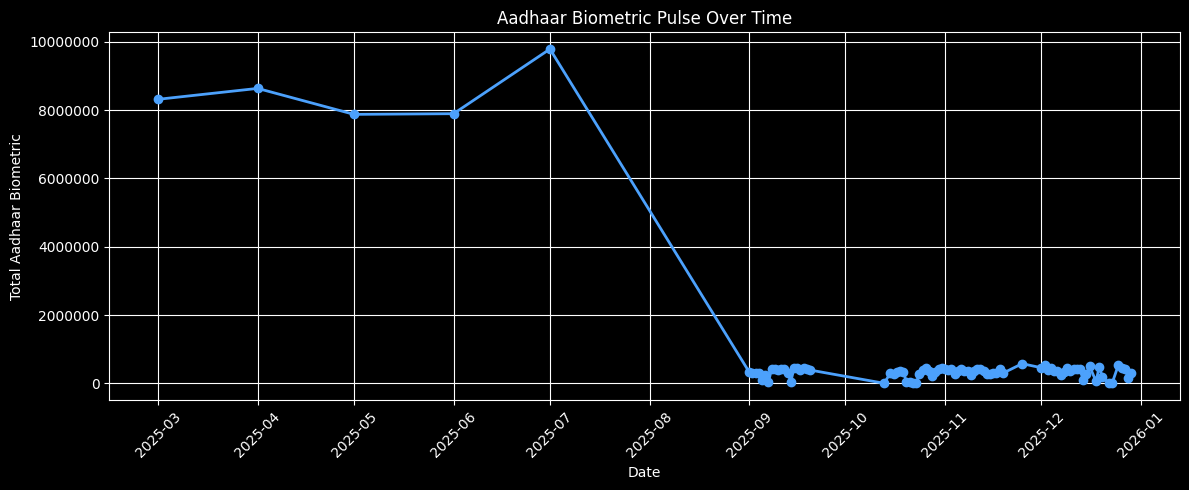

In [16]:
# Line plot of biometric over time
df3["date"] = pd.to_datetime(
    df3["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

df3 = df3[df3["date"].notna()]

daily_pulse = (
    df3.groupby("date")["total_biometric"]
      .sum()
      .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(
    daily_pulse["date"],
    daily_pulse["total_biometric"],
    color=colors[1], 
    marker="o",
    linewidth=2
)

plt.title("Aadhaar Biometric Pulse Over Time")
plt.xlabel("Date")
plt.ylabel("Total Aadhaar Biometric")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


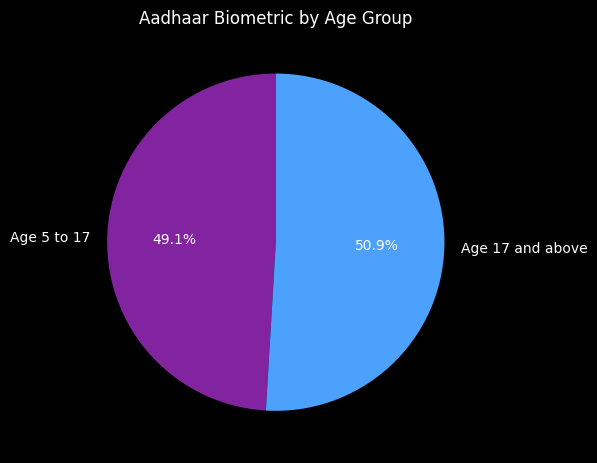

In [17]:
# pie chart 
plt.figure(figsize=(6,6))
plt.pie([df3['bio_age_5_17'].sum(), df3['bio_age_17_'].sum()], 
        labels=["Age 5 to 17", "Age 17 and above"], 
        autopct=lambda p: f"{p:.1f}%",
        startangle=90,
        colors=colors
       )
plt.title("Aadhaar Biometric by Age Group")
plt.tight_layout()
plt.show()